## Generate figures for varying the data parameters (Two Moons and Blobs)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import lines, markers

In [2]:
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['figure.figsize'] = (14*0.393701, 7.5*0.393701)

In [3]:
two_moons_samples = pd.read_csv('../../results/analysis/two_moons_analysis_samples.csv')
two_moons_jitter = pd.read_csv('../../results/analysis/two_moons_analysis_jitter.csv')
blobs = pd.read_csv('../../results/analysis/den_blobs_analysis_dim.csv')

In [4]:
mean_std_1 = two_moons_samples.groupby('n_samples')[['ROCK', 'DBSCAN', 'K_MEANS', 'SPECTRAL', 'MEAN_SHIFT']].agg([np.mean, np.std])
mean_std_2 = two_moons_jitter.groupby('jitter')[['ROCK', 'DBSCAN', 'K_MEANS', 'SPECTRAL', 'MEAN_SHIFT']].agg([np.mean, np.std])
mean_std_3 = blobs.groupby('features')[['ROCK', 'DBSCAN', 'K_MEANS', 'SPECTRAL', 'MEAN_SHIFT']].agg([np.mean, np.std])

In [5]:
def generate_figure(mean_std, xlabel):
    fig, ax = plt.subplots(1,1)
        
    ax.plot(mean_std.index, mean_std['DBSCAN']['mean'], linestyle='--', marker='P', label='DBSCAN')
    ax.fill_between(mean_std.index, mean_std['DBSCAN']['mean'] - mean_std['DBSCAN']['std'], mean_std['DBSCAN']['mean'] + mean_std['DBSCAN']['std'], alpha=0.3)

    ax.plot(mean_std.index, mean_std['K_MEANS']['mean'], linestyle=":", marker='^', label='K_MEANS')
    ax.fill_between(mean_std.index, mean_std['K_MEANS']['mean'] - mean_std['K_MEANS']['std'], mean_std['K_MEANS']['mean'] + mean_std['K_MEANS']['std'], alpha=0.3)

    ax.plot(mean_std.index, mean_std['SPECTRAL']['mean'], linestyle='-.', marker='p', label='SPECTRAL')
    ax.fill_between(mean_std.index, mean_std['SPECTRAL']['mean'] - mean_std['SPECTRAL']['std'], mean_std['SPECTRAL']['mean'] + mean_std['SPECTRAL']['std'], alpha=0.3)

    ax.plot(mean_std.index, mean_std['MEAN_SHIFT']['mean'], linestyle='--', marker='*', label='MEAN_SHIFT')
    ax.fill_between(mean_std.index, mean_std['MEAN_SHIFT']['mean'] - mean_std['MEAN_SHIFT']['std'], mean_std['MEAN_SHIFT']['mean'] + mean_std['MEAN_SHIFT']['std'], alpha=0.3)

    ax.plot(mean_std.index, mean_std['ROCK']['mean'], linestyle='-', marker='o', label='ROCK')
    ax.fill_between(mean_std.index, mean_std['ROCK']['mean'] - mean_std['ROCK']['std'], mean_std['ROCK']['mean'] + mean_std['ROCK']['std'], alpha=0.3)

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel(xlabel)
    plt.ylabel('Mean AMI')
    plt.tight_layout()


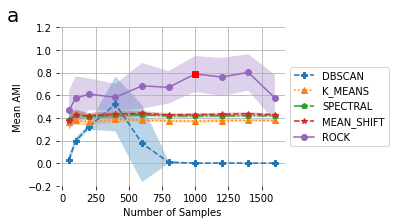

In [6]:
generate_figure(mean_std_1, 'Number of Samples')
plt.plot(1000, 0.7881, 'rs')
plt.ylim(-0.2, 1.2)
plt.title('a', y=1, x=-0.2, fontsize=20)
plt.savefig('../../figures/two_moons_analysis_samples.png', dpi = 600, bbox_inches='tight')

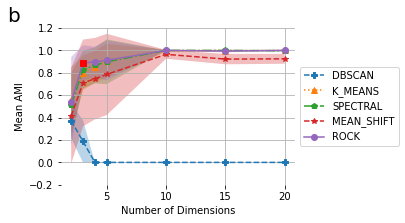

In [7]:
generate_figure(mean_std_3, 'Number of Dimensions')
plt.gca().set_xticks([1, 5, 10, 15, 20])
plt.plot(mean_std_3['ROCK']['mean'].index[1], mean_std_3['ROCK']['mean'].iloc[1], 'rs')
plt.ylim(-0.2, 1.2)
plt.title('b', y=1, x=-0.2, fontsize=20)
plt.savefig('../../figures/blobs_analysis_dim.png', dpi = 600, bbox_inches='tight')

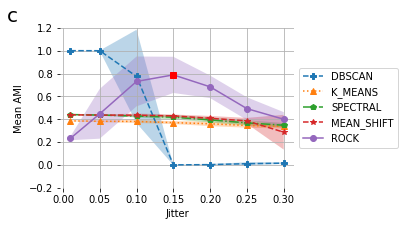

In [8]:
generate_figure(mean_std_2, 'Jitter')
plt.plot(mean_std_2['ROCK']['mean'].index[3], mean_std_2['ROCK']['mean'].iloc[3], 'rs')
plt.ylim(-0.2, 1.2)
plt.title('c', y=1, x=-0.2, fontsize=20)
plt.savefig('../../figures/two_moons_analysis_jitter.png', dpi = 600, bbox_inches='tight')